In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('/Users/HP/Desktop/Assignment/assignment_3/Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [35]:
x=df.drop([[]],axis=1).values

In [10]:
df.shape

(440, 8)

In [38]:
x.shape

(440, 6)

In [13]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
#KMEANS

In [45]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df.values)
pred_y = kmeans.fit_predict(df.values)
print(pred_y)

[0 0 0 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 0 0 1
 0 2 1 1 0 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0
 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 1 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1
 1 0 0 1 0 0 2 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 1 2 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 2 0
 2 0 1 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 0 0]


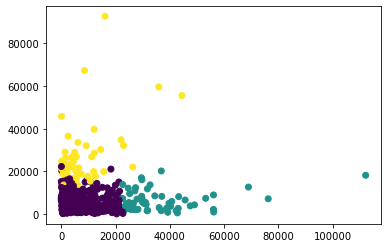

In [49]:
plt.scatter(x[:,0],x[:,2],c=pred_y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


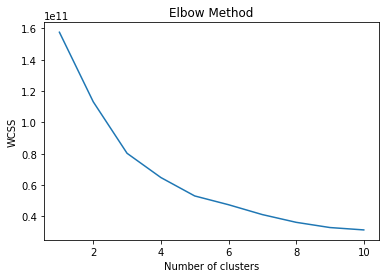

In [25]:
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

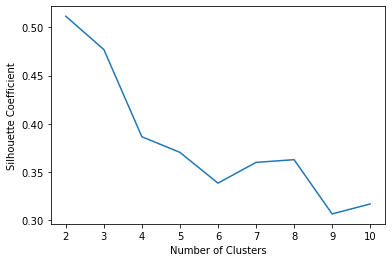

In [28]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [50]:
#Heirarchical

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
ac2 = AgglomerativeClustering(n_clusters = 3)

In [61]:
ac2.fit(df)

AgglomerativeClustering(n_clusters=3)

In [62]:
pred_y = ac2.fit_predict(df)

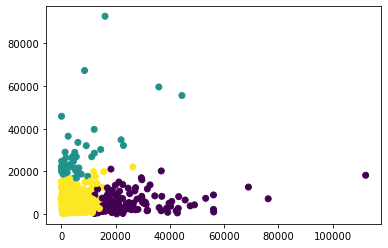

In [63]:
plt.scatter(x[:,0],x[:,2],c=pred_y)

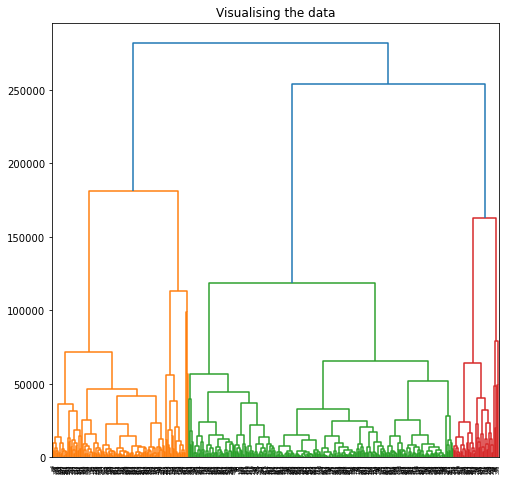

In [70]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='ward')))